# Multi Output Regessor Model Prediction using Recursive Feature Elimination as feature selection method.

In [90]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [91]:

data = pd.read_csv('data2.csv')

X = data[['WordPercent', 'LetterPercent','Rep','VowelCount']]
y = data[['1 try', '2 tries', '3 tries','4 tries','5 tries','6 tries','7 or more tries (X)']]
#split into testing/training sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Use Recursive Feature Elimination for feature selection
rf = RandomForestRegressor()
rfe = RFE(estimator=rf, n_features_to_select=5)
X_train_selected = rfe.fit_transform(X_train, y_train)

#get feature selctions 
selected_feature_names = X_train.columns[rfe.support_]

#Train a MultiOutput Random Forest Regressor on the selected features
best_multi_output_rf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, max_depth=None, min_samples_split=2, min_samples_leaf=1))
best_multi_output_rf.fit(X_train[selected_feature_names], y_train)

selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)
#use selected hyperparameters in eerie attribute data frame to make a prediction

Selected Features: Index(['WordPercent', 'LetterPercent', 'Rep', 'VowelCount'], dtype='object')


## Making a prediction

In [92]:
#making predictions on the dataset
X_test_selected = rfe.transform(X_test)
y_pred = best_multi_output_rf.predict(X_test_selected)

# tells us our model preforms, room for optimization?
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Absolute Error on Test Set: {mae}')
print(f'Mean Squared Error on Test Set: {mse}')
print(f'Root Mean Squared Error on Test Set: {rmse}')

# create a DataFrame with the word attributes for the word "eerie"
eerie_attributes = pd.DataFrame({'WordPercent': [0.00023], 'LetterPercent': [0.418799], 'Rep': [2],'VowelCount':[4]})

# use the trained model to make a prediciton for the results of "eerie"
eerie_attributes_selected = rfe.transform(eerie_attributes[selected_feature_names])
eerie_distribution = best_multi_output_rf.predict(eerie_attributes_selected)

print("Predicted Distribution for the word 'eerie':")
print(eerie_distribution)

Mean Absolute Error on Test Set: 3.4013492063492063
Mean Squared Error on Test Set: 24.927282539682544
Root Mean Squared Error on Test Set: 4.99272295843486
Predicted Distribution for the word 'eerie':
[[ 0.07  1.31  6.91 20.99 33.92 29.88 12.52]]


/Users/marcuslenz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/marcuslenz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/marcuslenz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/marcuslenz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/marcuslenz/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.w

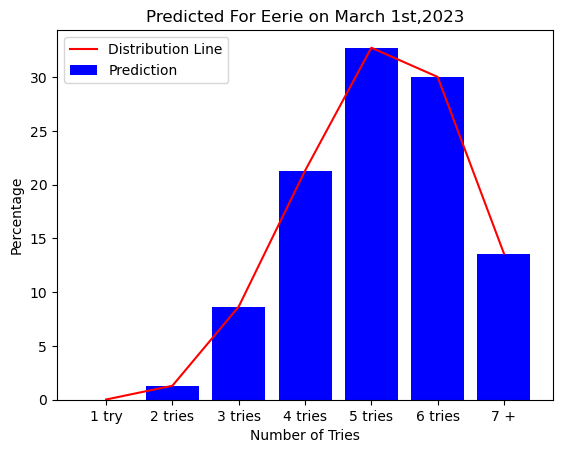

In [88]:
import matplotlib.pyplot as plt

categories = ['1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 +']

eerie_distribution_array = np.array(eerie_distribution)

plt.bar(categories,prediction,label='Prediction',color='blue')
plt.plot(categories, prediction, linestyle='-', color='red', label='Distribution Line')
plt.xlabel('Number of Tries')
plt.ylabel('Percentage')
plt.title('Predicted For Eerie on March 1st,2023')
plt.legend()

plt.show()